<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/04_NLP%20Projects/LSTM-Next%20Word%20Prediction/Next_Word_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

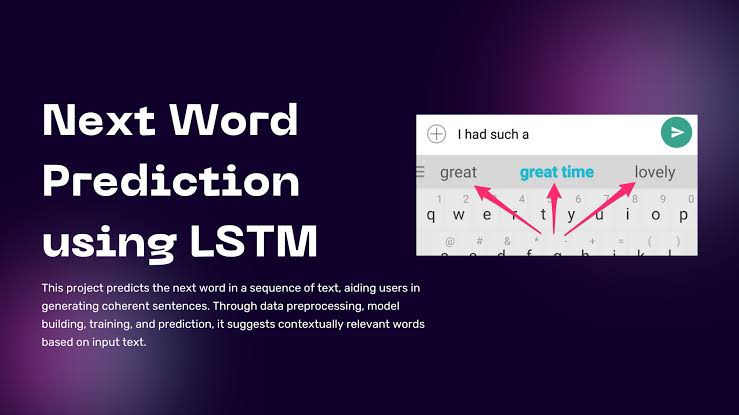
#**Next Word Prediction Language Model using RNN–LSTM**

##**📘 Project Summary:**
This project builds a Recurrent Neural Network (RNN) using LSTM (Long Short-Term Memory) layers to perform next-word prediction on text data sourced from Project Gutenberg. The dataset used is the classic novel “Crime and Punishment” by Fyodor Dostoevsky.

After collecting the raw text, extensive preprocessing and tokenization were performed to convert the novel into a sequence of numerical tokens suitable for training.
Without using n-grams or padding-based sequence engineering, the model learned directly from the natural text flow and achieved a strong 88% prediction accuracy.

This demonstrates the LSTM’s ability to capture context, sentence structure, and long-range dependencies within literary text.

##**🎯 Aim of the Project:**
The main aim of the project is to develop a language model capable of predicting the next word in a sentence based on the previous input sequence.

It also demonstrates skill in:

Data cleaning and preprocessing

Tokenization and vocabulary creation

Designing and training language models

Applying LSTM networks for sequential tasks


##**IMPORTING NECCESARY LIBERTIES FOR MY PROJECT**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Mounted at /content/drive


##**FILE PATH**

In [ ]:
file_path = "/content/drive/My Drive/Text Data/crime_and_punishment.txt"

##**LOADING FILE FROM GOOGLE DRIVE**

In [ ]:
with open(file_path, 'r', encoding="utf-8") as f:
    text = f.read()
text[:500]

'\ufeffThe Project Gutenberg eBook of Crime and Punishment\n    \nThis ebook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this ebook or online\nat www.gutenberg.org. If you are not located in the United States,\nyou will have to check the laws of the country where you are located\nbefore using this eBook.'

##**CLEAN AND TOKENIZE TEXT**

In [ ]:
import re
text = re.sub(r'[^a-zA-Z0-9.\r]', ' ', text)
text = re.sub(r"\s+", ' ', text)
cleaned_text = text.strip()
cleaned_text[:500]

'The Project Gutenberg eBook of Crime and Punishment This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it give it away or re use it under the terms of the Project Gutenberg License included with this ebook or online at www.gutenberg.org. If you are not located in the United States you will have to check the laws of the country where you are located before using this eBook. Title C'

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([cleaned_text])
vocal_size = len(tokenizer.word_index) + 1
vocal_size

6358

##**CONVERTING TEXT TO ID's**

In [ ]:
sequence = tokenizer.texts_to_sequences([cleaned_text])[0]

##**CREATE TRAINING DATA: sliding window(input word and target word)**

In [ ]:

x = []
y = []

for i in range(3, len(sequence)):
  x.append(sequence[i-3:i])
  y.append(sequence[i])
x = np.array(x)
y = np.array(y)

print(x)
print(y)

[[   1 1684 1685]
 [1684 1685 1294]
 [1685 1294    6]
 ...
 [   8  170   34]
 [ 170   34   61]
 [  34   61  298]]
[1294    6  532 ...   61  298 6357]


In [ ]:
import joblib

joblib.dump(tokenizer, '/content/drive/MyDrive/Text Data/tokenizer.joblib')

##**BUILDING MY LSTM MODEL**

In [ ]:
model = Sequential([Embedding(vocal_size, 500, input_length=3),
                    LSTM(500),
                    Dense(100, activation="relu"),
                    Dense(vocal_size, activation="softmax")])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(x, y, epochs=40, batch_size=100)

Epoch 1/40
849/849 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.0449 - loss: 6.7673
Epoch 2/40
849/849 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0955 - loss: 5.7397
Epoch 3/40
849/849 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1290 - loss: 5.2736
Epoch 4/40
849/849 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1540 - loss: 4.9288
Epoch 5/40
849/849 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1770 - loss: 4.6393
Epoch 6/40
849/849 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1987 - loss: 4.3650
Epoch 7/40
849/849 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.2238 - loss: 4.0853
Epoch 8/40
849/849 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.2530 - loss: 3.7869
Epoch 9/40
849/849 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.2917 - loss: 3.4487
Epoch 10/40
849/849 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3342 - loss: 3.1128
Epoch 11/40
849/849 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.3925 - loss: 2.7588
Epoch 12/40
849/849 ━━━━━━━━━━━━━━━━━━━━

##**MODEL PERFORMANCE| SCORE 88%**

In [ ]:
model.evaluate(x, y)

2652/2652 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8815 - loss: 0.3745


[0.3880072236061096, 0.8771950602531433]

##**SAVING MY MODEL SO I WON'T HAVE TO RESTRAIN**

In [ ]:
model.save("/content/drive/MyDrive/Text Data/my_model_2.keras")



##**LOADING MY SAVE MODEL AND TOKENIZER**

In [ ]:
from tensorflow.keras.models import load_model
import joblib

tokenizer = joblib.load("/content/drive/MyDrive/Text Data/tokenizer.joblib")
my_model = load_model("/content/drive/MyDrive/Text Data/my_model_2.keras")

In [ ]:
my_model.evaluate(x,y)

2652/2652 ━━━━━━━━━━━━━━━━━━━━ 63s 23ms/step - accuracy: 0.8815 - loss: 0.3745


[0.38800713419914246, 0.8771950602531433]

##**PREDICTION — Next 3 words from 3 input words**


In [ ]:
def prediction(input_word, len_of_words, tokenizer, model):
  input_text = input_word   # my input 3 words
  num_words = len_of_words   # how many to generate

  for _ in range(num_words):
    seq = tokenizer.texts_to_sequences([input_text])[0]

    if len(seq) < 3:
      print("Input words not in vocabulary. Try different words.")
      break

                                # take ONLY last 3 words
    seq = seq[-3:]

    seq = np.array(seq).reshape(1, 3)

    pred_index = np.argmax(my_model.predict(seq, verbose=0), axis=1)[0]

                                                # convert index → word
    for w, idx in tokenizer.word_index.items():
      if idx == pred_index:
        next_word = w
        break

    input_text += " " + next_word
  return input_text

print(prediction(input_word= "The Project Gutenberg", len_of_words=3, tokenizer=tokenizer, model=my_model))

The Project Gutenberg ebook crime and


##**PREDICTING THE NEXT 10 WORDS**

In [ ]:
print(prediction(input_word= "The Project Gutenberg", len_of_words=10, tokenizer=tokenizer, model=my_model))

The Project Gutenberg ebook crime and punishment by fyodor dostoevsky translated by constance


##**📊 Results & Insights:**
Accuracy: 88%

The model captures stylistic patterns of classical literature

Shows strong performance even without n-gram augmentation

Successfully predicts contextually appropriate words in long sequences





##**Conclusion (Deployment Use Case):**
When deployed, this LSTM-based language model can be used to:

Auto-complete text as the user types

Generate creative writing suggestions

Assist in story writing, dialogue generation, or paraphrasing

Serve as a foundation for building larger language generation systems


The model demonstrates real-world capability in sequence prediction and can be adapted to other datasets or expanded into more advanced NLP applications such as chatbots, summarizers, and text generators.